In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Lấy dữ liệu

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


Xem phân bố giá trị label trong dữ liệu

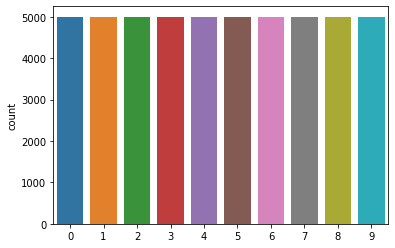

In [ ]:
Y_test=y_test
# Count plot for training set
sns.countplot(y_train.ravel())

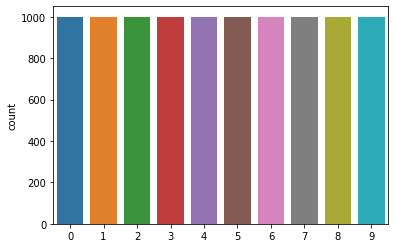

In [ ]:
# Count plot for test set
sns.countplot(y_test.ravel())

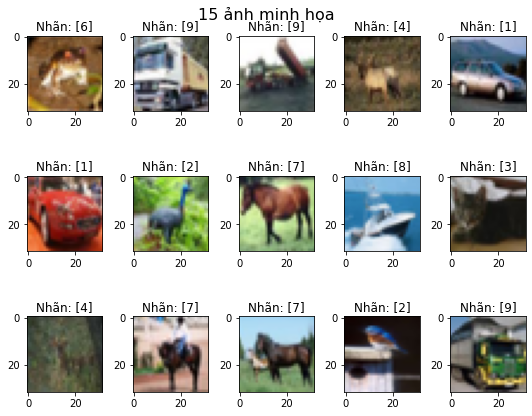

In [ ]:
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("15 ảnh minh họa", fontsize=16)
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Nhãn: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

Bước tiền xử lý dữ liệu

In [ ]:
print(x_train.shape)
print(y_train.shape)

#y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
#y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_train=x_train.reshape(50000, 3*32*32)
X_test=x_test.reshape(10000,3*32*32)
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)
(50000, 3072)
(50000, 1)


In [ ]:
'''#transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)'''

'#transform\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test=sc.fit_transform(X_test)'

In [ ]:
X_train.shape

(50000, 3072)

Bước training model

In [ ]:
#training
from sklearn.linear_model import LogisticRegression
Cfier = LogisticRegression(random_state =0)
Cfier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Đánh giá

In [ ]:
import itertools
#hàm vẽ confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
from sklearn.metrics import confusion_matrix
#thực hiện
cm = confusion_matrix(y_train, Cfier.predict(X_train))
plot_confusion_matrix(cm,["0","1"])
plt.show()
 

Confusion matrix, without normalization
[[2470  281  227  180  112  146  127  290  802  365]
 [ 300 2642  101  105   92  175  206  259  431  689]
 [ 505  236 1446  335  528  461  667  404  261  157]
 [ 250  302  411 1372  252  941  604  273  273  322]
 [ 328  139  633  279 1607  436  672  592  133  181]
 [ 183  262  475  767  327 1770  474  347  215  180]
 [  96  190  300  552  482  431 2441  225  109  174]
 [ 244  202  358  272  447  366  198 2337  158  418]
 [ 853  336   93  128   66  193   49   80 2725  477]
 [ 369  855   89  112   77  119  188  231  480 2480]]


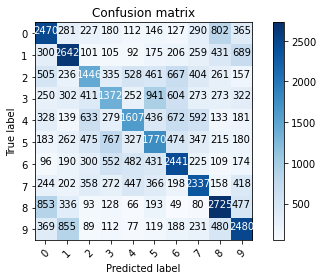

In [ ]:
from sklearn.metrics import confusion_matrix
#thực hiện
cm = confusion_matrix(y_train, Cfier.predict(X_train))
plot_confusion_matrix(cm,["0","1"])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Cfier.predict(X_train)))

0.4258


Confusion matrix, without normalization
[[484  46  56  41  22  30  22  50 176  73]
 [ 62 486  14  32  22  35  35  52  95 167]
 [121  44 272  85 112  93 136  68  48  21]
 [ 43  56  99 257  52 192 121  54  48  78]
 [ 65  23 133  58 289  95 148 125  33  31]
 [ 51  46  88 151  86 342  85  78  44  29]
 [ 12  33  74 117 100  87 485  40  21  31]
 [ 49  49  65  50  89  79  51 442  44  82]
 [172  77  18  27  10  51   8  16 520 101]
 [ 88 190  17  20  16  28  39  48 107 447]]


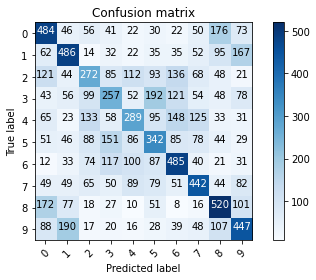

In [ ]:
cm = confusion_matrix(y_test, Cfier.predict(X_test))
plot_confusion_matrix(cm,["0","1","2","3","4","5","6","7","8","9"])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Cfier.predict(X_test)))

0.4024


In [ ]:
X_pred=Cfier.predict(X_test).reshape(-1,1)
print (X_pred)

[[3]
 [9]
 [8]
 ...
 [5]
 [5]
 [7]]


In [ ]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


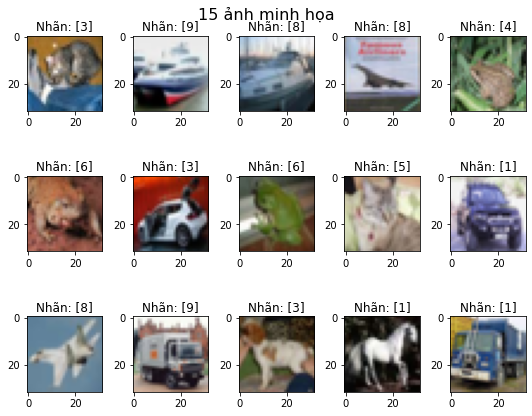

In [ ]:
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("15 ảnh minh họa", fontsize=16)
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title('Nhãn: {}'.format(X_pred[i]))
plt.tight_layout()
plt.show()

0. airplane
1. automobile
2. bird
3. cat
4. deer
5.dog
6. frog
7. horse
8. ship 
9. truck